In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import pandas as pd
from scipy.integrate import trapz

# new measurments 

Background and reference sample

In [2]:
background_sample2 = pd.read_csv('measurments again/background.csv')
reference_sample2= pd.read_csv('measurments again/Ref_Rh_800nm.csv')
sample2= pd.read_csv('measurments again/Sample_R12_SmallSize_800nm.csv')


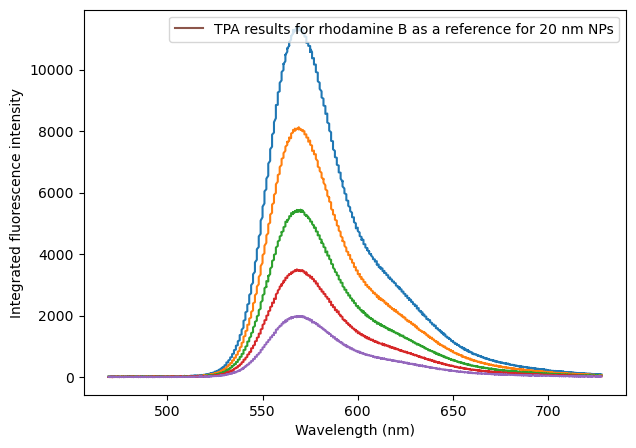

In [3]:
background_sample2_intensity = background_sample2.iloc[:, 9:14].values
intensity_ref = reference_sample2.iloc[:, 9:14].values
intensity_sample2 = sample2.iloc[:, 7:12].values

x_data_ref = reference_sample2.iloc[:, 0].values
x_data_sample2 = sample2.iloc[:, 0].values

areas_ref = []

plt.figure(figsize=(7,5))

for i in range(intensity_ref.shape[1]):
    adjusted_intensity = intensity_ref[:, i] - background_sample2_intensity[:, i]
    plt.plot(x_data_ref, adjusted_intensity)
    area_sample2_reference = np.trapz(adjusted_intensity, x=x_data_ref)
    areas_ref.append(area_sample2_reference)


plt.plot([], [], label='TPA results for rhodamine B as a reference for 20 nm NPs')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Integrated fluorescence intensity')
plt.legend()
plt.show()


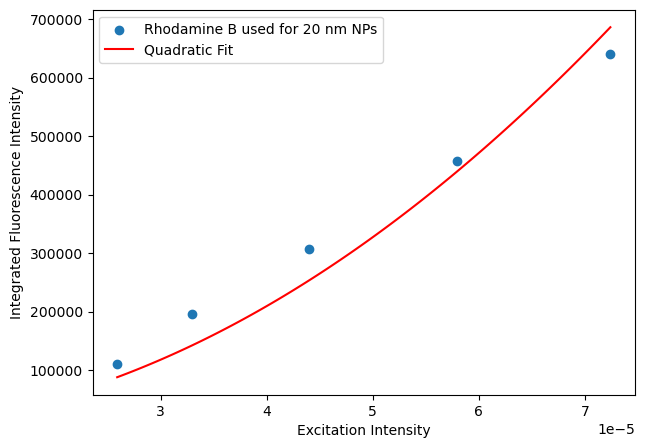

[1.30937545e+14]


In [4]:
reference_iexc = np.array(reference_sample2.iloc[:, 1][9:14].values)
reference_area = np.array(areas_ref)

plt.figure(figsize=(7,5))
def quadratic_fit(I_excitation, a):
    return a * I_excitation**2

X_referenceiexc = reference_iexc[:, np.newaxis]**2

# Solve for the coefficient 'a' using least squares
a_opt, _, _, _ = np.linalg.lstsq(X_referenceiexc, reference_area, rcond=None)

# Generate fitted curve using the obtained coefficient
reference_iexc_fit = np.linspace(min(reference_iexc), max(reference_iexc), 100)
reference_F_fit = quadratic_fit(reference_iexc_fit, a_opt)

# Plotting
plt.scatter(reference_iexc, reference_area, label='Rhodamine B used for 20 nm NPs')
plt.plot(reference_iexc_fit, reference_F_fit, 'r-', label='Quadratic Fit')

plt.xlabel('Excitation Intensity')
plt.ylabel('Integrated Fluorescence Intensity')

plt.legend()
plt.show()

print(a_opt)

sample

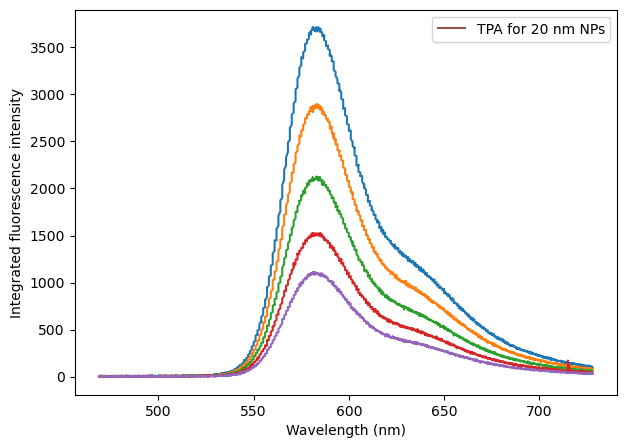

In [5]:
x_data_sample2 = sample2.iloc[:, 0].values

areas_sample = []

plt.figure(figsize=(7,5))
for i in range(intensity_sample2.shape[1]):
    adjusted_intensity_for_sample = intensity_sample2[:, i] - background_sample2_intensity[:, i]
    plt.plot(x_data_sample2, adjusted_intensity_for_sample)
    area_sample2 = np.trapz(adjusted_intensity_for_sample, x=x_data_sample2)
    areas_sample.append(area_sample2)


plt.plot([], [], label='TPA for 20 nm NPs')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Integrated fluorescence intensity')
plt.legend()
plt.show()

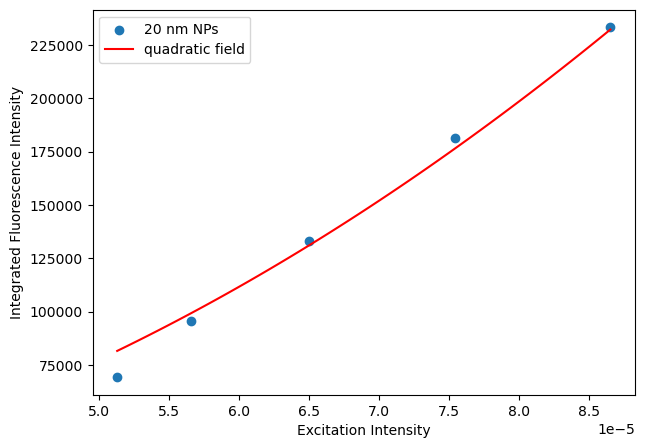

Optimized 'a': [3.10254634e+13]


In [6]:
sample_iexc = np.array(sample2.iloc[:, 1][7:12].values)
sample_F = np.array(areas_sample)

plt.figure(figsize=(7,5))
# Construct the design matrix
X = sample_iexc[:, np.newaxis]**2

a_opt = np.linalg.lstsq(X, sample_F, rcond=None)[0]

# Generate fitted curve using the obtained coefficient
sample_iexc_fit = np.linspace(min(sample_iexc), max(sample_iexc))
sample_F_fit = quadratic_fit(sample_iexc_fit, a_opt)

# Plotting
plt.scatter(sample_iexc, sample_F, label='20 nm NPs')
plt.plot(sample_iexc_fit, sample_F_fit, 'r-', label='quadratic field')
plt.xlabel('Excitation Intensity')
plt.ylabel('Integrated Fluorescence Intensity')
plt.legend()
plt.show()

# Optimized coefficient 'a'
print("Optimized 'a':", a_opt)

# abs measurments


In [7]:
abs_refandsample= pd.read_csv('measurments again/abs for ref and sample again.csv')


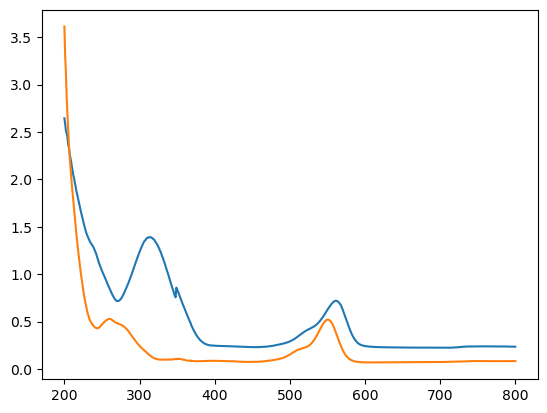

In [8]:
plt.plot(abs_refandsample.iloc[:,0], abs_refandsample.iloc[:,1])
plt.plot(abs_refandsample.iloc[:,2], abs_refandsample.iloc[:,3])
#plt.plot(abs_refandsample.iloc[:,4], abs_refandsample.iloc[:,5])
# plt.ylim(0,1)
# plt.xlim(400,700)

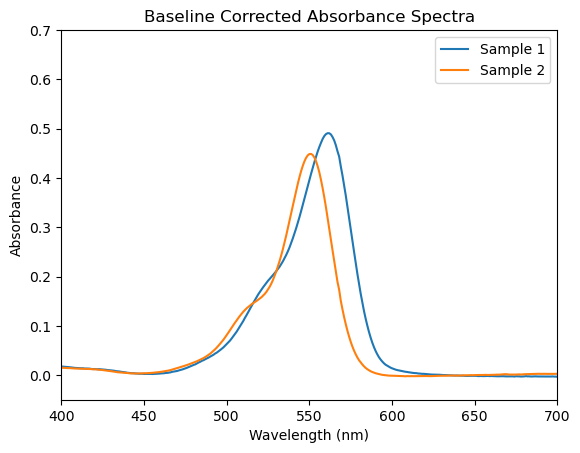

Absorbance at 560 nm for Sample 1: 0.4889269539306931
Absorbance at 542 nm for Reference Sample 1: 0.3739258383344554


In [9]:
import matplotlib.pyplot as plt

baseline_start = 600
baseline_end = 700

corrected_data = []
abs_values = {"560": [], "542": []}

#columns pairs
columns = [(0, 1), (2, 3)]

# Loop through each sample, correct the baseline, and find absorbance at 510 nm and 542 nm
for i, (wl_col, abs_col) in enumerate(columns):
    # Extract the wavelength and absorbance columns
    wavelengths = abs_refandsample.iloc[:, wl_col]
    absorbances = abs_refandsample.iloc[:, abs_col]

    # Calculate the average baseline in the range 600-700 nm
    baseline_avg = absorbances[(wavelengths >= baseline_start) & (wavelengths <= baseline_end)].mean()

    # Subtract the baseline average from the absorbance values
    corrected_absorbances = absorbances - baseline_avg
    corrected_data.append((wavelengths, corrected_absorbances))

    if i == 0:  # Sample columns (0, 1)
        # Find the absorbance at 510 nm
        abs_560 = corrected_absorbances[wavelengths == 560].values[0]
        abs_values["560"].append(abs_560)
    elif i == 1:  # Reference columns (2, 3)
        # Find the absorbance at 542 nm
        abs_542 = corrected_absorbances[wavelengths == 542].values[0]
        abs_values["542"].append(abs_542)

# Plot the baseline-corrected samples
for i, (wavelengths, corrected_absorbances) in enumerate(corrected_data):
    plt.plot(wavelengths, corrected_absorbances, label=f'Sample {i+1}')

plt.ylim(-0.05, 0.7)
plt.xlim(400, 700)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected Absorbance Spectra')
plt.show()

# Print the absorbance at 510 nm and 542 nm for each sample
for i, abs_560 in enumerate(abs_values["560"]):
    print(f'Absorbance at 560 nm for Sample {i+1}: {abs_560}')
for i, abs_542 in enumerate(abs_values["542"]):
    print(f'Absorbance at 542 nm for Reference Sample {i+1}: {abs_542}')


(10.0, 40.0)

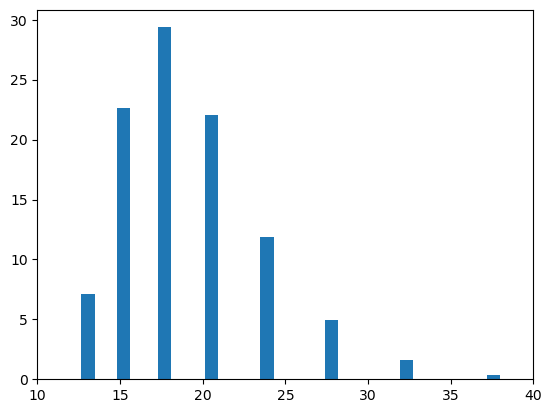

In [10]:
size= np.loadtxt('measurments again/Simin nps.txt')
plt.bar(size[:,0], size[:,1])
plt.xlim(10,40)